In [1]:
import numpy as np
import pickle
import os

import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-
#glr-auto-examples-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots(figsize=(5, 5))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    plt.rcParams.update({'font.size': 13})
    
    plt.tight_layout()
    
    fig.savefig('imgs/' + title + '.png', dpi=300)

In [13]:
EXP_FOLDER = './experiments/test/0-no-regularization/'

In [14]:
files = os.listdir(EXP_FOLDER)

print('Files:', len(files))
print(files)

files = [f for f in files if f[-1] == 'l']

print('Files:', len(files))
print(files)

Files: 6
['small.pkl', 'small.pkl.pt', 'solids.pkl', 'solids.pkl.pt', 'textures.pkl', 'textures.pkl.pt']
Files: 3
['small.pkl', 'solids.pkl', 'textures.pkl']


In [19]:
EXP = 2

with open(EXP_FOLDER + files[EXP], 'rb') as f:
    # Train set information
    FOLDER_TRAIN = pickle.load(f)
    FOLDER_TEST = pickle.load(f) # Only if test experiment!
    CLASSES = pickle.load(f)

    WINDOW = pickle.load(f)
    ELECTRODES = pickle.load(f)
    TACTILE_IMAGE_ROWS = pickle.load(f)
    TACTILE_IMAGE_COLS = pickle.load(f)

    # Model information
    hidden_channels = pickle.load(f)
    kernel_sizes = pickle.load(f)
    dropout = pickle.load(f)
    learning_rate = pickle.load(f)
    l2_reg = pickle.load(f)
    step_size = pickle.load(f)
    lr_decay = pickle.load(f)

    # Training information
    FOLDS = pickle.load(f)
    #cv_train_indices = pickle.load(f) # Only if not a test experiment!
    #cv_val_indices = pickle.load(f) # Only if not a test experiment!

    cv_loss_history = pickle.load(f)
    cv_loss_history_val = pickle.load(f)
    cv_accuracy_history = pickle.load(f)
    cv_accuracy_history_val = pickle.load(f)

    cv_precision = pickle.load(f)
    cv_recall = pickle.load(f)
    cv_f1_score = pickle.load(f)
    cv_conf_matrix = pickle.load(f)

hidden_channels [32, 32, 32] kernel_sizes [3, 3, 3]


Text(0.5,1,'accuracy')

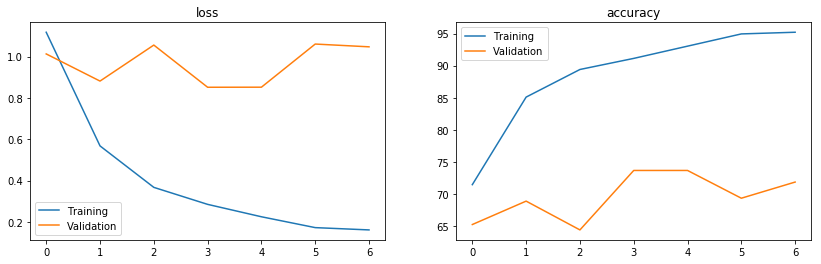

In [6]:
# Model information
print('hidden_channels', hidden_channels, 'kernel_sizes', kernel_sizes)

# Training information
FOLD = 3
plt.subplots(1, 2, figsize=(14,4))

plt.subplot(1, 2, 1)
plt.plot(cv_loss_history[FOLD])
plt.plot(cv_loss_history_val[FOLD])
plt.legend(['Training', 'Validation'])
plt.title('loss')

plt.subplot(1, 2, 2)
plt.plot(cv_accuracy_history[FOLD])
plt.plot(cv_accuracy_history_val[FOLD])
plt.legend(['Training', 'Validation'])
plt.title('accuracy')

Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>

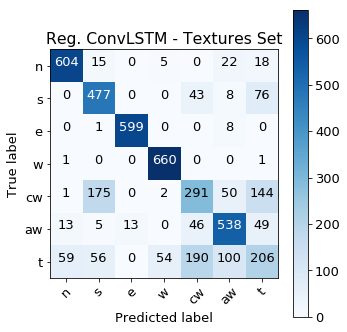

In [105]:
plt.figure()
plot_confusion_matrix(cv_conf_matrix[FOLD], normalize=False, classes=CLASSES, title='Reg. ConvLSTM - Textures Set')

In [26]:
folds_ok = [1, 2, 3]

cv_accuracy_history_val = list( cv_accuracy_history_val[i] for i in folds_ok )
cv_precision = list( cv_precision[i] for i in folds_ok )
cv_recall = list( cv_recall[i] for i in folds_ok )
cv_f1_score = list( cv_f1_score[i] for i in folds_ok )

In [27]:
np.array(cv_accuracy_history_val)

array([[14.42558747, 14.42558747, 14.84986945, 38.93603133, 44.28851175,
        49.93472585, 44.54960836, 50.26109661, 53.65535248, 53.45953003,
        52.08877285, 55.18929504, 57.57180157, 57.89817232, 57.50652742,
        55.87467363, 60.57441253, 60.47650131, 62.14099217, 61.12924282,
        63.34856397, 63.74020888, 67.29765013, 59.79112272, 69.68015666,
        69.41906005, 71.01827676, 71.31201044, 71.31201044, 66.35117493],
       [14.39295039, 14.39295039, 14.39295039, 14.39295039, 14.39295039,
        14.42558747, 14.39295039, 14.39295039, 14.39295039, 14.39295039,
        14.49086162, 14.42558747, 14.42558747, 14.49086162, 14.49086162,
        14.49086162, 14.49086162, 29.27545692, 46.86684073, 50.97911227,
        59.39947781, 52.08877285, 64.16449086, 66.54699739, 67.62402089,
        66.97127937, 68.96214099, 70.82245431, 72.55221932, 70.07180157],
       [14.36031332, 14.49086162, 14.36031332, 14.36031332, 44.94125326,
        59.10574413, 62.01044386, 65.27415144, 63

In [20]:
print('accuracy:', np.mean(np.array(cv_accuracy_history_val)[:, -1]), "+/-", np.std(np.array(cv_accuracy_history_val)[:, -1]))
print('precision:', np.mean(np.array(cv_precision), axis=0), "+/-", np.std(np.array(cv_precision), axis=0))
print('recall:', np.mean(np.array(cv_recall), axis=0), "+/-", np.std(np.array(cv_recall), axis=0))
print('f1-score:', np.mean(np.array(cv_f1_score), axis=0), "+/-", np.std(np.array(cv_f1_score), axis=0))

print()
#print('accuracy:', np.mean(np.max(np.array(cv_accuracy_history_val))), "+/-", np.std(np.max(np.array(cv_accuracy_history_val), axis=1)))
print('accuracy:', np.mean(np.array(cv_accuracy_history_val)[:, -1]), "+/-", np.std(np.array(cv_accuracy_history_val)[:, -1]))
print('precision:', np.mean(np.mean(np.array(cv_precision), axis=0)), "+/-", np.mean(np.std(np.array(cv_precision), axis=0)))
print('recall:', np.mean(np.mean(np.array(cv_recall), axis=0)), "+/-", np.mean(np.std(np.array(cv_recall), axis=0)))
print('f1-score:', np.mean(np.mean(np.array(cv_f1_score), axis=0)), "+/-", np.mean(np.std(np.array(cv_f1_score), axis=0)))

accuracy: 66.04415011037528 +/- 1.5737145668837837
precision: [91.04747072 84.22806853 98.81522258 97.33116512 38.83821598 43.16313887
 22.69618295] +/- [5.61028701 9.88913571 0.57131829 3.72806377 9.95239991 7.10915966
 7.90032696]
recall: [80.45180723 72.45033113 95.39473684 98.36858006 37.73755656 63.22289157
 17.86466165] +/- [12.76603958  3.68220258  2.48567572  1.63086037 12.43311423  9.64297715
  9.2753557 ]
f1-score: [84.43198465 77.60019924 97.05543725 97.79600868 37.78578009 50.36691144
 19.56894244] +/- [ 6.99524242  4.82432685  1.2312828   1.9230322  11.04716744  3.74142818
  8.88006548]

accuracy: 66.04415011037528 +/- 1.5737145668837837
precision: 68.01706639282368 +/- 6.394384472268307
recall: 66.49865214839402 +/- 7.4166036198659855
f1-score: 66.37218054168154 +/- 5.520363624158859


In [29]:
accuracy = np.mean(np.array(cv_accuracy_history_val)[:, -1])
accstd = np.std(np.array(cv_accuracy_history_val)[:, -1])

precision = np.mean(np.array(cv_precision), axis=0)
precstd = np.std(np.array(cv_precision), axis=0)

recall = np.mean(np.array(cv_recall), axis=0)
recstd = np.std(np.array(cv_recall), axis=0)

fscore = np.mean(np.array(cv_f1_score), axis=0)
fscstd = np.std(np.array(cv_f1_score), axis=0)

In [30]:
print(accuracy, accstd)
print(np.concatenate((precision.reshape([-1, 1]), precstd.reshape([-1, 1])), axis=1))
print(np.concatenate((recall.reshape([-1, 1]), recstd.reshape([-1, 1])), axis=1))
print(np.concatenate((fscore.reshape([-1, 1]), fscstd.reshape([-1, 1])), axis=1))

76.47954743255004 11.791046703310773
[[93.43882224  4.83711114]
 [79.88121851 13.23854022]
 [99.47447447  0.46279384]
 [90.02160997 10.22758695]
 [53.32745697 26.3343999 ]
 [56.81221681 15.60915099]
 [49.82665776 27.97363217]]
[[97.27272727  3.85694608]
 [92.94294294  6.19903764]
 [99.62292609  0.28217627]
 [92.75362319  5.12775631]
 [53.16742081 18.67943601]
 [60.39304611 14.03251767]
 [40.13605442 41.2989025 ]]
[[95.21333122  3.15592164]
 [85.38408685  8.4243197 ]
 [99.54819149  0.31899454]
 [91.15284038  7.10554822]
 [52.80195864 22.37120421]
 [58.51660643 14.85460762]
 [41.40806908 36.99202613]]


## Plots generation

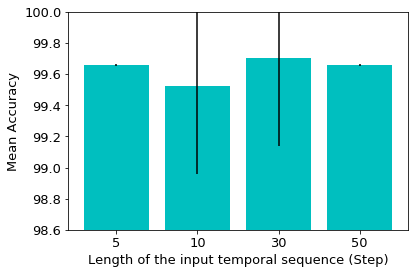

In [4]:
#accs = [73.984375, 87.77994792, 91.953125, 97.23307292, 86.23422413, 76.47954743] # Capas
#stds = [1.995992248, 1.692282599, 2.496250308, 1.467084513, 4.15914198, 11.7910467] # Capas
#labels = [1, 2, 3, 5, 7, 10] # Capas

#accs = [97.81901042, 97.49348958, 95.45355903]#, 13.78255208] # Conv Size
#stds = [1.261072918, 1.692708333, 1.698194346]#, 0.550351672] # Conv Size
#labels = ['3x3', '5x5', '7x7']#, 9] # Conv Size

#accs = [94.58821615, 98.21614583, 99.30989583, 97.71050347] # Kernels
#stds = [3.656018879, 1.17375428, 0.707931105, 0.734809156] # Kernels
#labels = [8, 16, 32, 64] # Kernels

#accs = [99.31054688, 99.36523438, 95.63151042, 69.45800781, 47.75] # Window
#stds = [0.55582108, 0.490014286, 2.907861406, 8.202071349, 1.116285694] # Window
#labels = [3, 5, 10, 30, 50] # Window

#accs = [99.65878378, 99.52225131, 99.70238095, 99.65878378] # Window-step
#stds = [0.006756757, 0.562827225, 0.562827225, 0.006756757] # Window-step
#labels = [5, 10, 30, 50] # Window-step

#accs = [99.11016949, 99.59635417, 99.44335938, 99.60611979, 99.26106771] # Batch
#stds = [0.368419065, 0.416666667, 0.387547556, 0.315335444, 0.39862681] # Batch
#labels = [8, 16, 32, 64, 128] # Batch

#accs = [85.45898438, 94.93815104, 98.76953125, 99.69075521, 99.44254557, 99.765625, 98.40494792, 99.80143229, 99.8046875] # Epochs
#stds = [5.570883692, 3.243942092, 0.508750636, 0.046035598, 0.353114154, 0.07027029, 2.726827225, 0.006510417, 0.0] # Epochs
#labels = [10, 15, 20, 25, 30, 35, 40, 45, 50] # Epochs

N = len(accs)

ind = np.arange(N)  # the x locations for the groups
width = 0.8       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, accs, width, color='c', yerr=stds, ecolor='black')
plt.ylim(98.6, 100)

# add some text for labels, title and axes ticks
ax.set_ylabel('Mean Accuracy')
plt.xlabel('Length of the input temporal sequence (Step)')
ax.set_xticks(ind)
ax.set_xticklabels(labels)
plt.rcParams.update({'font.size': 13})
plt.tight_layout()

fig.savefig('imgs/window-step.png', dpi=300)

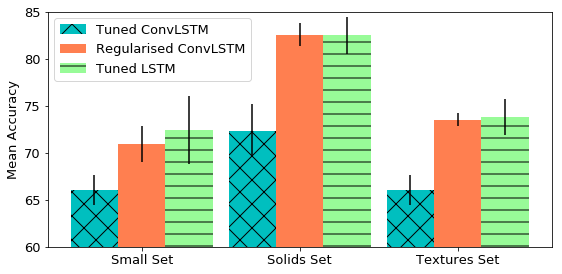

In [60]:
tuned_conv_accs = [66.04415011, 72.34496124, 66.04415011]
regu_conv_accs = [70.94132818, 82.56459948, 73.54525386]
lstm_accs = [72.41134752, 82.51937984, 73.80573951]

tuned_conv_stds = [1.573714567, 2.805537037, 1.573714567]
regu_conv_stds = [1.922119799, 1.240141838, 0.688883214]
lstm_stds = [3.583786604, 1.978200305, 1.955336565]

labels = ['Small Set', 'Solids Set', 'Textures Set']

N = len(labels)

ind = np.arange(N)  # the x locations for the groups
width = 0.3      # the width of the bars

fig, ax = plt.subplots(figsize=(8, 4))
rects1 = ax.bar(ind, tuned_conv_accs, width, color='c', yerr=tuned_conv_stds, ecolor='black', hatch='x')
rects2 = ax.bar(ind + width, regu_conv_accs, width, color='coral', yerr=regu_conv_stds, ecolor='black')
rects3 = ax.bar(ind + width*2, lstm_accs, width, color='palegreen', yerr=lstm_stds, ecolor='black', hatch='-')

plt.ylim(60, 85)

ax.set_ylabel('Mean Accuracy')
ax.set_xticks(ind + width)
ax.set_xticklabels(labels)

ax.legend((rects1[0], rects2[0], rects3[0]), ('Tuned ConvLSTM', 'Regularised ConvLSTM', 'Tuned LSTM'), loc='upper left')

plt.rcParams.update({'font.size': 13})
plt.tight_layout()

fig.savefig('imgs/general-acc.png', dpi=300)